# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Fraud.csv')

In [10]:
print(data.columns)

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


# Data Cleaning

In [8]:
data.dropna(inplace=True)
data = data[(data['amount'] < data['amount'].quantile(0.95)) & (data['amount'] > data['amount'].quantile(0.05))]
corr_matrix = data.corr().abs()
upper = np.triu(corr_matrix, k=1)
to_drop = [column for column in range(len(upper[0])) if any(upper[:, column] > 0.8)]
data = data.drop(data.columns[to_drop], axis=1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_616\4005766409.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().abs()


# Fraud Detection Model

In [13]:
# Define features (X) and target variable (y)
X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data['isFraud']

In [14]:
# Convert categorical variables into numerical (if needed)
X = pd.get_dummies(X, columns=['type'], drop_first=True)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = RandomForestClassifier(random_state=42)

# Train the model

In [20]:
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Performance Evaluation

In [21]:
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("AUC-ROC Score:", roc_auc_score(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    927027
           1       0.98      0.55      0.71       643

    accuracy                           1.00    927670
   macro avg       0.99      0.78      0.85    927670
weighted avg       1.00      1.00      1.00    927670

Confusion Matrix:
[[927020      7]
 [   287    356]]
AUC-ROC Score: 0.7768235961848646


# Key Predictive Factors

Feature Importances:
                importance
newbalanceDest    0.389255
step              0.167355
oldbalanceOrg     0.138621
amount            0.119252
oldbalanceDest    0.114580
type_TRANSFER     0.068657
type_CASH_OUT     0.001720
type_PAYMENT      0.000516
type_DEBIT        0.000045


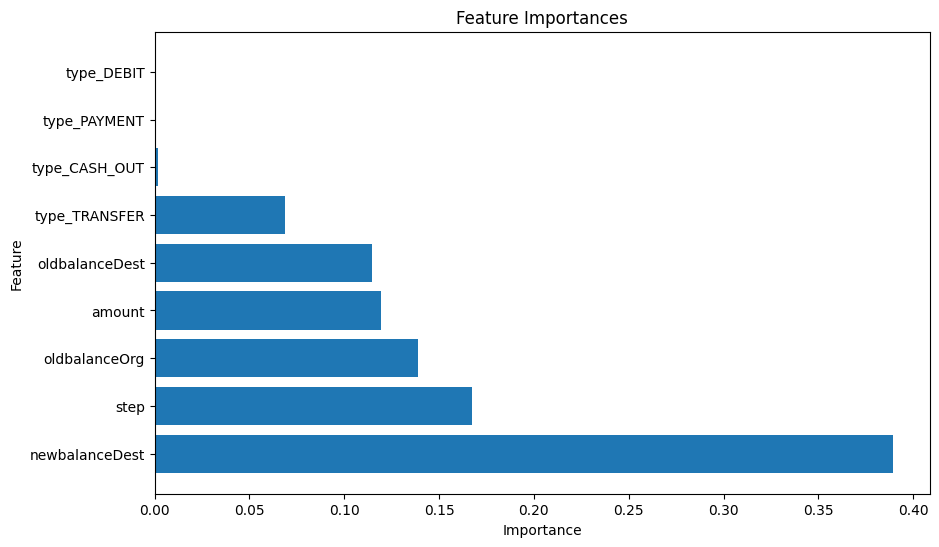

In [22]:
# Extract feature importances from the trained model
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

#####  When a company is updating its infrastructure, especially in the context of handling financial transactions and preventing fraudulent activities, it's crucial to implement robust preventive measures to enhance security. Here are some recommendations:

1. **Enhance Authentication Methods:**
   - Implement multi-factor authentication (MFA) for both customers and internal users.
   - Explore biometric authentication methods (fingerprint, facial recognition) for added security.

2. **Encrypt Sensitive Data:**
   - Ensure that all sensitive data, including customer information and transaction details, is encrypted both in transit and at rest.

3. **Real-time Transaction Monitoring:**
   - Implement real-time monitoring systems to detect unusual or suspicious transactions promptly.
   - Use anomaly detection algorithms to identify patterns deviating from normal behavior.

4. **Access Controls:**
   - Regularly review and update access controls to limit privileges based on job roles.
   - Monitor and log all user activities to detect unauthorized access.

5. **Update Security Protocols:**
   - Keep security protocols and software up to date to address vulnerabilities.
   - Regularly conduct security audits and penetration testing to identify and fix potential weaknesses.

6. **Employee Training and Awareness:**
   - Train employees on cybersecurity best practices, emphasizing the importance of secure passwords, avoiding phishing scams, and reporting suspicious activities.

7. **Implement Fraud Detection Models:**
   - Utilize machine learning models to detect patterns associated with fraudulent transactions.
   - Continuously update and fine-tune the models based on evolving fraud tactics.

8. **Collaboration with Industry Partners:**
   - Collaborate with other financial institutions and industry partners to share information about emerging threats and fraud trends.
   - Participate in industry-wide initiatives to combat financial fraud.

9. **Customer Education:**
   - Educate customers about security best practices, such as protecting their login credentials, recognizing phishing attempts, and regularly monitoring their accounts for unusual activities.

10. **Incident Response Plan:**
    - Develop and regularly update an incident response plan to ensure a swift and effective response to any security incidents.
    - Conduct regular drills to test the effectiveness of the incident response plan.

11. **Compliance with Regulations:**
    - Ensure compliance with relevant regulatory requirements and standards for financial transactions and data security.

12. **Secure APIs and Interfaces:**
    - If the infrastructure involves APIs or interfaces with other systems, ensure they are secured and follow best practices for secure communication.

13. **Regular Security Audits:**
    - Conduct regular security audits to identify vulnerabilities and address them proactively.

14. **Customer Communication:**
    - Maintain transparent communication with customers regarding security updates, new features, and any changes in the security infrastructure.

15. **Data Backups:**
    - Regularly backup critical data and ensure that recovery processes are in place in case of a security incident.



### 

1. **Security Metrics and Key Performance Indicators (KPIs):**
   - Establish and monitor security metrics and KPIs that align with the goals of the implemented security measures. This could include metrics related to incident detection and response times, successful patching rates, user compliance with security policies, etc.

2. **Penetration Testing and Red Teaming:**
   - Conduct regular penetration testing and red teaming exercises to simulate real-world cyber-attacks. These exercises help identify potential weaknesses in the security infrastructure and evaluate the effectiveness of incident response procedures.

3. **Vulnerability Scanning:**
   - Regularly scan the infrastructure for vulnerabilities using automated tools. Address and remediate any vulnerabilities discovered during these scans.

4. **Incident Response Drills:**
   - Conduct incident response drills to test the effectiveness of the incident response plan. Evaluate how well the team can detect, respond to, and mitigate simulated security incidents.

5. **Security Audits and Reviews:**
   - Periodically perform comprehensive security audits and reviews to assess the overall security posture. This includes reviewing access controls, network configurations, and the implementation of security policies.

6. **User Awareness and Training:**
   - Monitor the level of user awareness and adherence to security policies through training programs. Implement periodic phishing simulations to assess users' ability to recognize and avoid phishing attempts.

7. **Continuous Monitoring and SIEM Alerts:**
   - Leverage Security Information and Event Management (SIEM) systems to continuously monitor network and system logs. Regularly review SIEM alerts to identify and respond to potential security incidents.

8. **Review and Analyze Security Incidents:**
   - Analyze any security incidents that occur after the implementation of security measures. Conduct a thorough post-incident analysis to understand the root causes and identify areas for improvement.

9. **Compliance Audits:**
   - Ensure ongoing compliance with industry regulations and standards by conducting periodic compliance audits. Verify that the implemented security measures align with regulatory requirements.

10. **Customer Feedback and Reports:**
    - Solicit feedback from customers regarding the security of their data and transactions. Monitor customer reports and inquiries related to security concerns.

11. **Benchmarks and Best Practices:**
    - Compare the security measures and controls in place against industry benchmarks and best practices. This can provide insights into areas where improvements or adjustments may be needed.

12. **Documentation Review:**
    - Regularly review and update security documentation, including policies, procedures, and configurations. Ensure that documentation accurately reflects the current state of security measures.

13. **Incident Metrics Analysis:**
    - Analyze metrics related to security incidents, including the number of incidents, types of incidents, and time to resolution. Identify patterns and trends that may indicate areas of improvement.

14. **Collaboration with Third-Party Security Assessors:**
    - Engage third-party security assessors or auditors to provide an external perspective on the effectiveness of security measures. This can include independent security assessments and audits.

15. **Drills for Specific Security Scenarios:**
    - Conduct drills and simulations for specific security scenarios, such as a data breach or a DDoS attack. Evaluate the organization's response and recovery capabilities in these specific situations.

